## Exercise 8 - K-means clustering

- Download the dataset from [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv)
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and IQR (*interquantile range measured in kHz*) columns. Filter data so that only forementioned columns will be included.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns
dataset = pd.read_csv("voice.csv")
filtered_data = dataset[["meanfun","IQR"]]
filtered_data

,meanfun,IQR
0,0.084279,0.075122
1,0.107937,0.073252
2,0.098706,0.123207
3,0.088965,0.111374
4,0.106398,0.127325
...,...,...
3163,0.182790,0.151859
3164,0.188980,0.162193
3165,0.209918,0.190936
3166,0.172375,0.176435


2 Run the predictions for the data so that it will be categorised for male and female data.

In [19]:
dataset.groupby("label").mean()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,0.191000,0.049142,0.195942,0.165349,0.223184,0.057834,2.984875,24.805224,0.873066,0.344763,0.178541,0.191000,0.169742,0.039429,0.263848,0.929544,0.064987,5.736107,5.671120,0.170073
male,0.170813,0.065110,0.175299,0.115562,0.226346,0.110784,3.295460,48.331698,0.917188,0.471670,0.152022,0.170813,0.115872,0.034175,0.253836,0.728877,0.040307,4.358447,4.318139,0.177430


3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

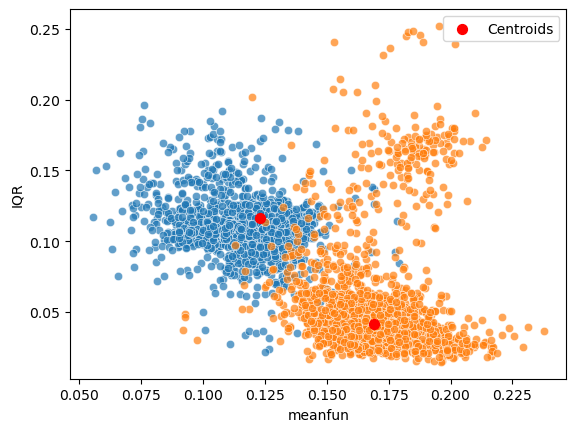

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

male_df = filtered_data[dataset["label"] == "male"]
female_df = filtered_data[dataset["label"] == "female"]
kmeans = KMeans(n_clusters=2, random_state=0).fit(filtered_data)
kmeans_male = KMeans(n_clusters=2, random_state=0).fit(male_df)
kmeans_female = KMeans(n_clusters=2, random_state=0).fit(female_df)

sns.scatterplot(x="meanfun", y="IQR", data=male_df, palette="Set1", alpha=0.7)
sns.scatterplot(x="meanfun", y="IQR", data=female_df, palette="Set2", alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.legend()

4 Validate K-means clustering prediction results using confusion matrix.

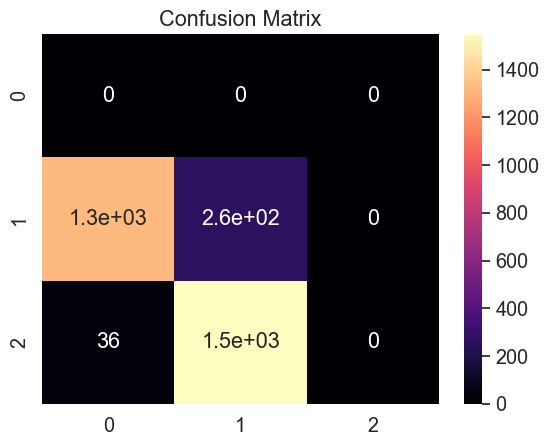

<Figure size 500x500 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

truth = []

x = filtered_data     
        
y_kmeans = kmeans.fit_predict(x)

for i in dataset["label"]:
    if i == "male":
        truth.append(2)
    elif i == "female":
        truth.append(1)
    else:
        truth.append(0)

labels = dataset["label"].unique()
     
conf_matrix = metrics.confusion_matrix(truth, y_kmeans)

ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot = True, ax = ax, cmap = "magma")
ax.set_title("Confusion Matrix")
plt.show()